# Mall Customers Segmentation
Clustering customers based on Annual Income and Spending Score to identify meaningful segments for marketing and business strategy.

## Overview
In this project, we use **K-Means clustering** to group customers of a mall into distinct segments.
- Features used: Annual Income (k$) and Spending Score (1-100)  
- Objective: Identify patterns in customer spending behavior to guide marketing and business decisions.

## Dataset
- Source: Kaggle – Mall Customers dataset
- Total records: ~200 customers
- Columns:
    - CustomerID
    - Gender
    - Age
    - Annual Income (k$)
    - Spending Score (1-100)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q kaggle
from google.colab import files #upload kaggle API key (kaggle.json)
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [35]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d shwetabh123/mall-customers
!unzip -o mall-customers.zip -d mall_customers


Dataset URL: https://www.kaggle.com/datasets/shwetabh123/mall-customers
License(s): CC0-1.0
mall-customers.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mall-customers.zip
  inflating: mall_customers/Mall_Customers.csv  


## Data Exploration
- Checked the dataset for missing values (none in Income or Spending Score).  
- Visualized distributions of Annual Income and Spending Score to understand spread and range.  
- This helps us understand the patterns before clustering.

In [36]:
df = pd.read_csv("mall_customers/Mall_Customers.csv")
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(df.info)

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


In [ ]:
print(df.isnull().sum)

<bound method DataFrame.sum of      CustomerID  Genre    Age  Annual Income (k$)  Spending Score (1-100)
0         False  False  False               False                   False
1         False  False  False               False                   False
2         False  False  False               False                   False
3         False  False  False               False                   False
4         False  False  False               False                   False
..          ...    ...    ...                 ...                     ...
195       False  False  False               False                   False
196       False  False  False               False                   False
197       False  False  False               False                   False
198       False  False  False               False                   False
199       False  False  False               False                   False

[200 rows x 5 columns]>


In [ ]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


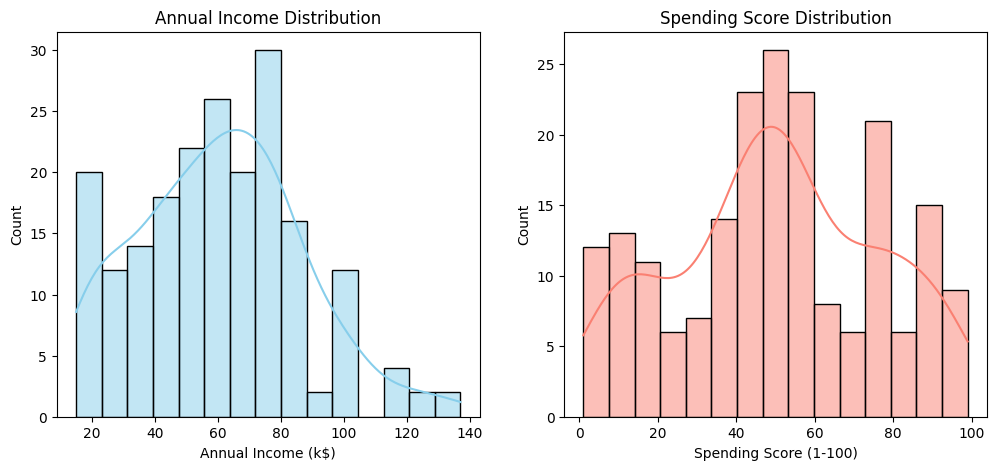

In [ ]:
plt.figure(figsize=(12,5))

#Annual income distribution
plt.subplot(1,2,1)
sns.histplot(df["Annual Income (k$)"], bins=15, kde=True, color="skyblue")
plt.title("Annual Income Distribution")

#Spending score distribution
plt.subplot(1,2,2)
sns.histplot(df["Spending Score (1-100)"], bins=15, kde=True, color="salmon")
plt.title("Spending Score Distribution")

plt.show()


## Choosing k (Elbow Method)
- K-Means requires the number of clusters (k) to be specified.  
- Used the **Elbow Method**: plotted WCSS (Within-Cluster Sum of Squares) for k=1 to 10.  
- The elbow point (where WCSS reduction slows down) is chosen as the optimal k.  
- For this dataset, **k = 5** was selected.

In [ ]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

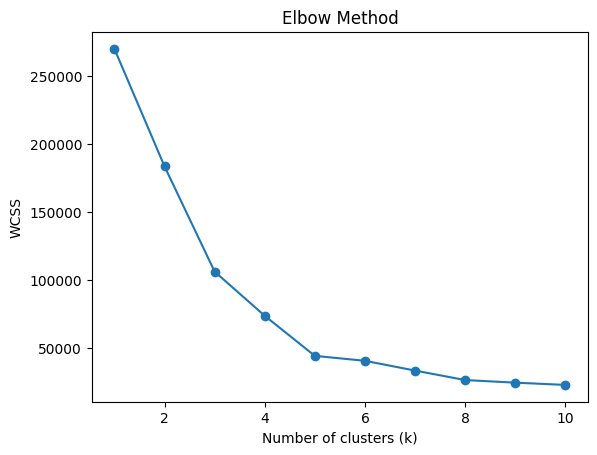

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

## Applying K-Means
- Fitted K-Means with k=5 clusters.  
- Each customer assigned a cluster label (0–4).  
- Cluster labels added to the dataset for visualization and analysis.

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

df["Cluster"] = y_kmeans

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Visualizing Clusters
- Plotted a scatter plot: Annual Income (x-axis) vs. Spending Score (y-axis)  
- Points colored by cluster assignment  
- Cluster centroids plotted as red X’s
- This visualization clearly shows the customer segments.

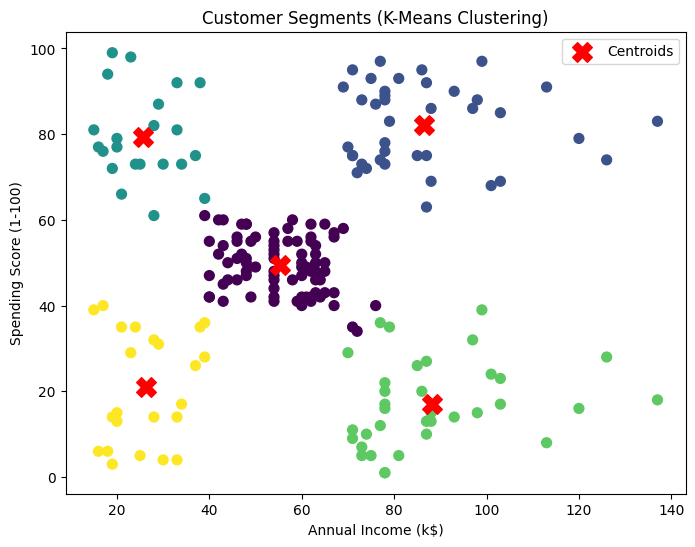

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(
    X.iloc[:, 0], X.iloc[:, 1],
    c=y_kmeans, cmap="viridis", s=50
)

plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    s=200, c="red", marker="X", label="Centroids"
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (K-Means Clustering)")
plt.legend()
plt.show()

## Cluster Interpretation
- **Cluster 0:** Low income, low spending – price-sensitive shoppers  
- **Cluster 1:** High income, high spending – VIP customers, highly valuable  
- **Cluster 2:** Average income, average spending – moderate customers  
- **Cluster 3:** High income, low spending – potential for upselling  
- **Cluster 4:** Low income, high spending – trend-driven shoppers  
- These insights can guide targeted marketing strategies.

## Conclusion
- K-Means clustering successfully identified **5 distinct customer segments**.  
- Businesses can use these segments for **targeted marketing, promotions, and loyalty programs**.  
- This project demonstrates how **unsupervised learning** can provide actionable business insights.

Optional extensions could include additional features such as Gender or Age to explore 3D clustering, but for simplicity, this analysis focuses on Income and Spending Score.